Import python libraries required for the script

In [1]:
from rfpimp import *
from sklearn.ensemble import RandomForestClassifier #, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import itertools as it
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
rfc = RandomForestClassifier(n_estimators=300, warm_start=True)


Read the CSV files

In [3]:
df = pd.read_csv('VMI_Data_BP1_V02_AK6_mod02.csv')
# print(df.columns)

In [4]:
df = df.drop(['SPLICE_OK', 'SPLICE_GRADE', 'MID_SPLICE_GRADE', 'RHT_SPLICE_GRADE', # 'LFT_SPLICE_GRADE', 
              'LFT_SPLICE_LENGTH', 'MID_SPLICE_LENGTH', 'RHT_SPLICE_LENGTH', 
              'LFT_SPLICE_DELTA', 'MID_SPLICE_DELTA', 'RHT_SPLICE_DELTA',              
#               'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20', 'LFT_SPLICE_MA50', 
#               'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10', 'LFT_SPLICE_SLOPE20', 'LFT_SPLICE_SLOPE50', 
#               'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 'MID_SPLICE_MA20', 'MID_SPLICE_MA50', 
#               'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10', 'MID_SPLICE_SLOPE20', 'MID_SPLICE_SLOPE50',  
#               'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10', 'RHT_SPLICE_MA20',  'RHT_SPLICE_MA50', 
#               'RHT_SPLICE_SLOPE5', 'RHT_SPLICE_SLOPE10',  'RHT_SPLICE_SLOPE20', 'RHT_SPLICE_SLOPE50'              
             ], axis=1)

# print(df.columns)

for col in df.columns:
    if len(df[col].unique()) == 1:
        df = df.drop(col,inplace=True,axis=1)
        
# print(df.columns)
# df['SPLICE_GRADE'].head

Check the columns in the data

In [5]:
print(df.shape)
df = df.drop_duplicates(subset=['CUT_LENGTH', 'CONV_WAIT_TIME', 'BP1_S8_L', 'BP1_S7_L', 'BP1_S6_L', 'BP1_S5_L', 
                                'BP1_S4_L', 'BP1_S3_L', 'BP1_S2_L', 'BP1_S1_ML', 'BP1_S1_MR', 'BP1_S2_R', 
                                'BP1_S3_R', 'BP1_S4_R', 'BP1_S5_R', 'BP1_S6_R', 'BP1_S7_R', 'BP1_S8_R'])
# df = df.drop_duplicates()
print(df.shape)
# df.head

(118264, 47)
(117555, 47)


In [6]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data.head(10))
df = df.dropna()

                  Total  Percent
LFT_SPLICE_GRADE      0      0.0
BP1_S2_R              0      0.0
LFT_SPLICE_MA5        0      0.0
LFT_SPLICE_PREV       0      0.0
PART_LENGTH           0      0.0
BP1_S8_R              0      0.0
BP1_S7_R              0      0.0
BP1_S6_R              0      0.0
BP1_S5_R              0      0.0
BP1_S4_R              0      0.0


In [7]:
# def numericSG(row):
#     if row['SPLICE_GRADE'] == 'Bad':
#         return 0
#     if row['SPLICE_GRADE'] == 'OK' :
#         return 1
#     return 2

# def inverse(x):
#     if x==0: 
#         return 0
#     return 1/x

In [8]:
df_train, df_test = train_test_split(df, test_size=0.25, stratify=df['LFT_SPLICE_GRADE'])

x1, y1 = df_train.drop('LFT_SPLICE_GRADE',axis=1), df_train['LFT_SPLICE_GRADE'].astype('int')
x2, y2 = df_test.drop('LFT_SPLICE_GRADE',axis=1), df_test['LFT_SPLICE_GRADE'].astype('int')

print(x1.columns)

Index(['CUT_LENGTH', 'CONV_WAIT_TIME', 'BP1_S8_L', 'BP1_S7_L', 'BP1_S6_L',
       'BP1_S5_L', 'BP1_S4_L', 'BP1_S3_L', 'BP1_S2_L', 'BP1_S1_ML',
       'BP1_S1_MR', 'BP1_S2_R', 'BP1_S3_R', 'BP1_S4_R', 'BP1_S5_R', 'BP1_S6_R',
       'BP1_S7_R', 'BP1_S8_R', 'PART_LENGTH', 'LFT_SPLICE_PREV',
       'LFT_SPLICE_MA5', 'LFT_SPLICE_MA10', 'LFT_SPLICE_MA20',
       'LFT_SPLICE_MA50', 'LFT_SPLICE_SLOPE5', 'LFT_SPLICE_SLOPE10',
       'LFT_SPLICE_SLOPE20', 'LFT_SPLICE_SLOPE50', 'MID_SPLICE_PREV',
       'MID_SPLICE_MA5', 'MID_SPLICE_MA10', 'MID_SPLICE_MA20',
       'MID_SPLICE_MA50', 'MID_SPLICE_SLOPE5', 'MID_SPLICE_SLOPE10',
       'MID_SPLICE_SLOPE20', 'MID_SPLICE_SLOPE50', 'RHT_SPLICE_PREV',
       'RHT_SPLICE_MA5', 'RHT_SPLICE_MA10', 'RHT_SPLICE_MA20',
       'RHT_SPLICE_MA50', 'RHT_SPLICE_SLOPE5', 'RHT_SPLICE_SLOPE10',
       'RHT_SPLICE_SLOPE20', 'RHT_SPLICE_SLOPE50'],
      dtype='object')


In [9]:
rfc.fit(x1,y1)
y2_RFC_model = rfc.predict(x2)
print("RandomForestClassifier Accuracy :", accuracy_score(y2, y2_RFC_model))
importances2 = rfc.feature_importances_
std2 = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices2 = np.argsort(importances2)[::-1]

RandomForestClassifier Accuracy : 0.9291911939841437


In [10]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print('Confusion matrix, without normalization')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in it.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
target_names = ['Bad', 'Good']
class_names = target_names

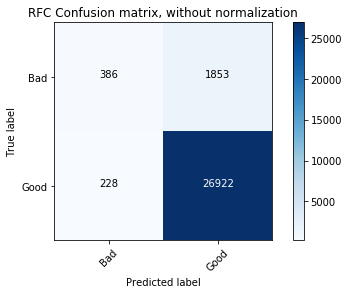

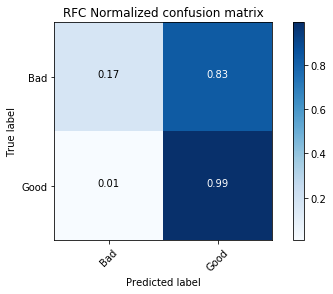

In [12]:

# Compute confusion matrix
cnf_matrix = confusion_matrix(y2, y2_RFC_model)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='RFC Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='RFC Normalized confusion matrix')

plt.show();

In [13]:
print(" *********** RandomForestClassifier *********** ")
print(classification_report(y2, y2_RFC_model, target_names=target_names, sample_weight=None, digits=4))


 *********** RandomForestClassifier *********** 
              precision    recall  f1-score   support

         Bad     0.6287    0.1724    0.2706      2239
        Good     0.9356    0.9916    0.9628     27150

   micro avg     0.9292    0.9292    0.9292     29389
   macro avg     0.7821    0.5820    0.6167     29389
weighted avg     0.9122    0.9292    0.9101     29389



In [14]:
# import numpy as np
# from scipy import interp
# import matplotlib.pyplot as plt

# from sklearn import svm, datasets
# from sklearn.metrics import roc_curve, auc
# from sklearn.model_selection import StratifiedKFold

# # Run classifier with cross-validation and plot ROC curves
# cv = StratifiedKFold(n_splits=6)
# classifier = svm.SVC(probability=True, random_state=7)

# tprs = []
# aucs = []
# mean_fpr = np.linspace(0, 1, 100)

# X = df.drop(['SPLICE_GRADE'], axis=1)
# y = df['SPLICE_GRADE'].astype('int')

# i = 0
# for train, test in cv.split(X, y):
#     probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
#     # Compute ROC curve and area the curve
#     fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
#     tprs.append(interp(mean_fpr, fpr, tpr))
#     tprs[-1][0] = 0.0
#     roc_auc = auc(fpr, tpr)
#     aucs.append(roc_auc)
#     plt.plot(fpr, tpr, lw=1, alpha=0.3,
#              label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

#     i += 1
# plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
#          label='Chance', alpha=.8)

In [15]:
# from sklearn.externals import joblib
# joblib.dump(rfc, 'rfc_bp1_02_great.pkl', compress=9)

In [16]:
from sklearn2pmml import sklearn2pmml
from sklearn2pmml import make_pmml_pipeline

pipeline = make_pmml_pipeline(rfc)
sklearn2pmml(pipeline, "rfc_bp1_lft.pmml", with_repr = True)